# Step 1: Import Necessary Libraries.

In [1]:
# Import Series and DataFrame into local namespace.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 2: Load the Datasets.

In [2]:
# Reading CSV file (train & test dataset).
train_data = pd.read_csv('train_u6lujuX_CVtuZ9i.csv')
test_data = pd.read_csv('test_Y3wMUE5_7gLdaTN.csv')

# Step 3: Data Exploration.

In [3]:
# Displaying the top 10 rows contents for understanding (train_data) data structure.
train_data.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [4]:
# Checking the number of rows and columns (train_data).
train_data.shape

(614, 13)

In [5]:
# Getting detailed dataset (train_data) information using the .info() function.
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
# Getting the Summary of numerical fields from 'train_data' using the describe() function.
train_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
# Displaying the top 10 rows contents for understanding (test_data) data structure.
test_data.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban
6,LP001055,Female,No,1,Not Graduate,No,2226,0,59.0,360.0,1.0,Semiurban
7,LP001056,Male,Yes,2,Not Graduate,No,3881,0,147.0,360.0,0.0,Rural
8,LP001059,Male,Yes,2,Graduate,NaN,13633,0,280.0,240.0,1.0,Urban
9,LP001067,Male,No,0,Not Graduate,No,2400,2400,123.0,360.0,1.0,Semiurban


# Step 4: Data Preprocessing.

In [8]:
# Checking missing values on (train_data).
train_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
# Missing data imputations on train_data.

# fill the missing value for numerical terms - mean.
train_data['LoanAmount']=train_data['LoanAmount'].fillna(train_data['LoanAmount'].mean())
train_data['Loan_Amount_Term']=train_data['Loan_Amount_Term'].fillna(train_data['Loan_Amount_Term'].mean())
train_data['Credit_History']=train_data['Credit_History'].fillna(train_data['Credit_History'].mean())

# fill the missing value for Categorical terms - mode.
train_data['Gender']=train_data['Gender'].fillna(train_data['Gender'].mode()[0])
train_data['Married']=train_data['Married'].fillna(train_data['Married'].mode()[0])
train_data['Dependents']=train_data['Dependents'].fillna(train_data['Dependents'].mode()[0])
train_data['Self_Employed']=train_data['Self_Employed'].fillna(train_data['Self_Employed'].mode()[0])

In [10]:
# Checking missing values in the dataset (train_data) after missing data imputations.
train_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [11]:
# Checking missing values on (test_data).
test_data.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [12]:
# Missing data imputations on test_data.

# fill the missing value for numerical terms - mean.
test_data['LoanAmount']=test_data['LoanAmount'].fillna(test_data['LoanAmount'].mean())
test_data['Loan_Amount_Term']=test_data['Loan_Amount_Term'].fillna(test_data['Loan_Amount_Term'].mean())
test_data['Credit_History']=test_data['Credit_History'].fillna(test_data['Credit_History'].mean())

# fill the missing value for Categorical terms - mode.
test_data['Gender']=test_data['Gender'].fillna(test_data['Gender'].mode()[0])
test_data['Dependents']=test_data['Dependents'].fillna(test_data['Dependents'].mode()[0])
test_data['Self_Employed']=test_data['Self_Employed'].fillna(test_data['Self_Employed'].mode()[0])

In [13]:
# Checking missing values in the dataset (test_data) after missing data imputations.
test_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

# Step 5: Data Visualization.

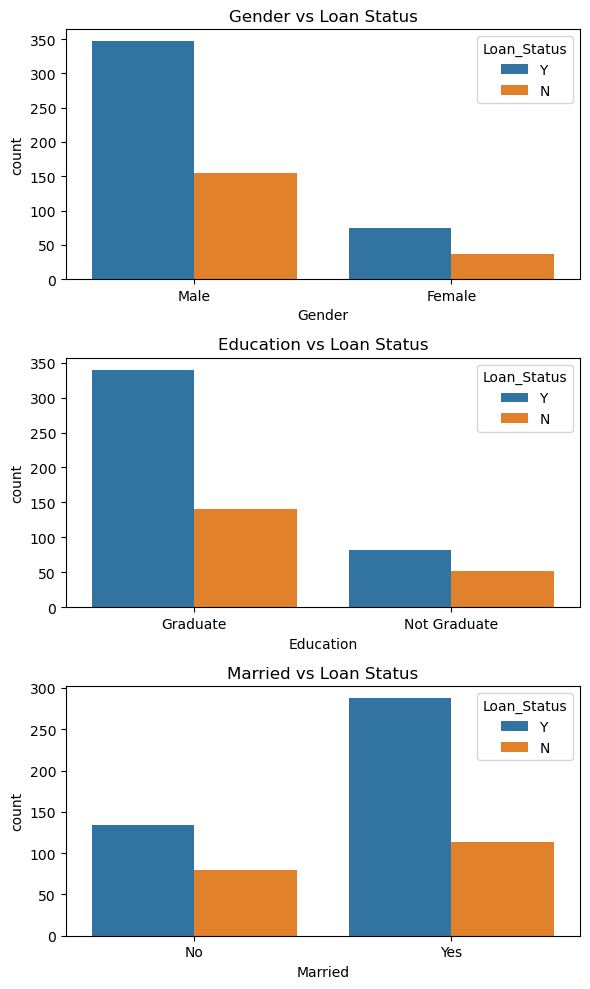

In [14]:
# Creating a figure with 3 subplots (3 rows, 1 column)
import seaborn as sns
import matplotlib.pyplot as plt
fig, axs = plt.subplots(3, 1, figsize=(6, 10))

# Creating a bar chart that shows the relationships between Gender & Loan Status.
sns.countplot(x='Gender', hue='Loan_Status', data=train_data, ax=axs[0])
axs[0].set_title('Gender vs Loan Status')

# Creating a bar chart that shows the relationships between Education & Loan Status.
sns.countplot(x='Education', hue='Loan_Status', data=train_data, ax=axs[1])
axs[1].set_title('Education vs Loan Status')

# Creating a bar chart that shows the relationships between Married & Loan Status.
sns.countplot(x='Married', hue='Loan_Status', data=train_data, ax=axs[2])
axs[2].set_title('Married vs Loan Status')
plt.tight_layout() # Adjusting layout and plotting.
plt.show()

<Axes: xlabel='LoanAmount', ylabel='ApplicantIncome'>

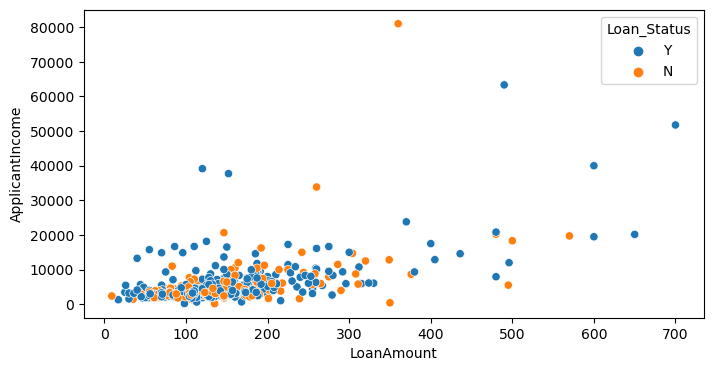

In [15]:
# Creating a scatter plot that shows the relationship among the variables applicant income & loan amount based on loan status.
plt.figure(figsize=(8,4))
sns.scatterplot(data=train_data,y='ApplicantIncome',x='LoanAmount',hue='Loan_Status')

C:\Users\mohsi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='ApplicantIncome', ylabel='Count'>

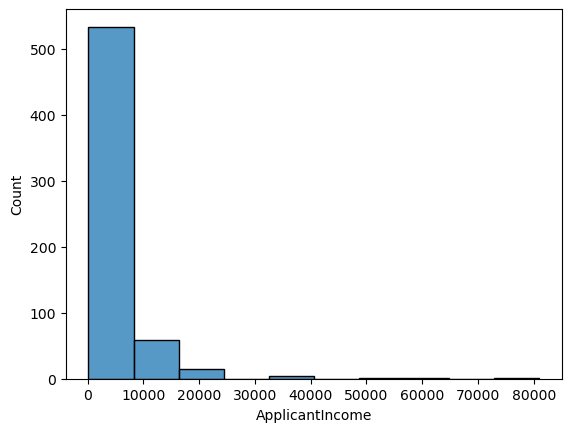

In [16]:
# Creating a histogram with the variable name ApplicantIncome.
sns.histplot(train_data["ApplicantIncome"], bins=10, kde=False)

<Axes: >

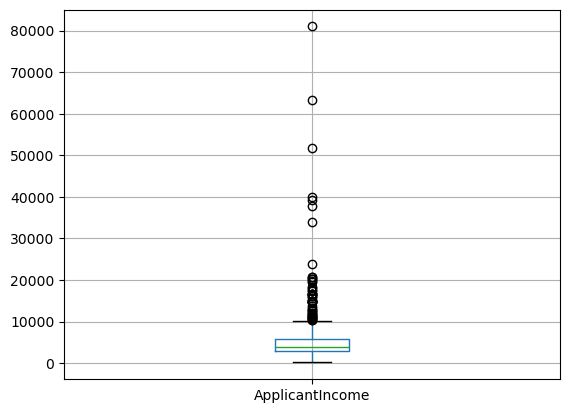

In [17]:
# Creating a boxplot with the variable name ApplicantIncome.
train_data.boxplot(column='ApplicantIncome')

C:\Users\mohsi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='LoanAmount', ylabel='Count'>

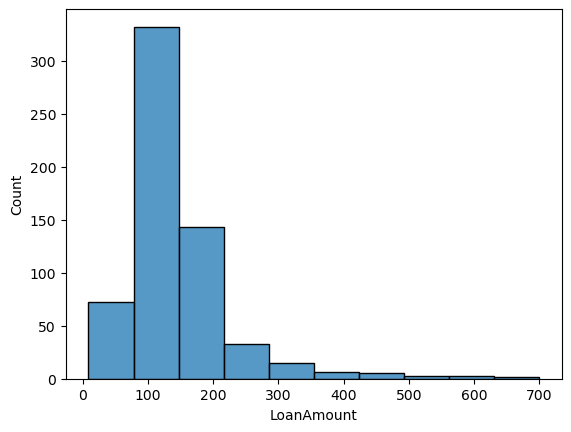

In [18]:
# Creating a histogram with the variable name LoanAmount.
sns.histplot(train_data["LoanAmount"], bins=10, kde=False)

<Axes: >

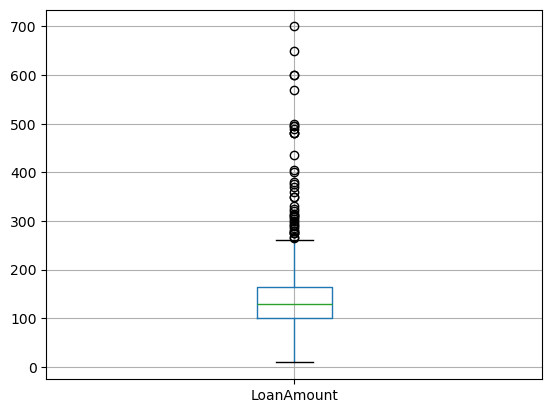

In [19]:
# Creating a boxplot with the variable name LoanAmount.
train_data.boxplot(column='LoanAmount')

# Step 6: Data Encoding.

In [20]:
# Categorical data converted into numeric data using the Label Encoder on train_data.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
datatype = train_data.dtypes==object
columns = train_data.columns[datatype].tolist()
train_data[columns]=train_data[columns].apply(lambda val : le.fit_transform(val))
train_data.head(10) # Displaying the data after applying the label encoding.

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
5,5,1,1,2,0,1,5417,4196.0,267.000000,360.0,1.0,2,1
6,6,1,1,0,1,0,2333,1516.0,95.000000,360.0,1.0,2,1
7,7,1,1,3,0,0,3036,2504.0,158.000000,360.0,0.0,1,0
8,8,1,1,2,0,0,4006,1526.0,168.000000,360.0,1.0,2,1
9,9,1,1,1,0,0,12841,10968.0,349.000000,360.0,1.0,1,0


In [21]:
# Categorical data converted into numeric data using the Label Encoder on test_data.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
datatype = test_data.dtypes==object
columns = test_data.columns[datatype].tolist()
test_data[columns]=test_data[columns].apply(lambda val : le.fit_transform(val))
test_data.head(10) # Displaying the data after applying the label encoding.

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,1,1,0,0,0,5720,0,110.0,360.0,1.000000,2
1,1,1,1,1,0,0,3076,1500,126.0,360.0,1.000000,2
2,2,1,1,2,0,0,5000,1800,208.0,360.0,1.000000,2
3,3,1,1,2,0,0,2340,2546,100.0,360.0,0.825444,2
4,4,1,0,0,1,0,3276,0,78.0,360.0,1.000000,2
5,5,1,1,0,1,1,2165,3422,152.0,360.0,1.000000,2
6,6,0,0,1,1,0,2226,0,59.0,360.0,1.000000,1
7,7,1,1,2,1,0,3881,0,147.0,360.0,0.000000,0
8,8,1,1,2,0,0,13633,0,280.0,240.0,1.000000,2
9,9,1,0,0,1,0,2400,2400,123.0,360.0,1.000000,1


<Axes: >

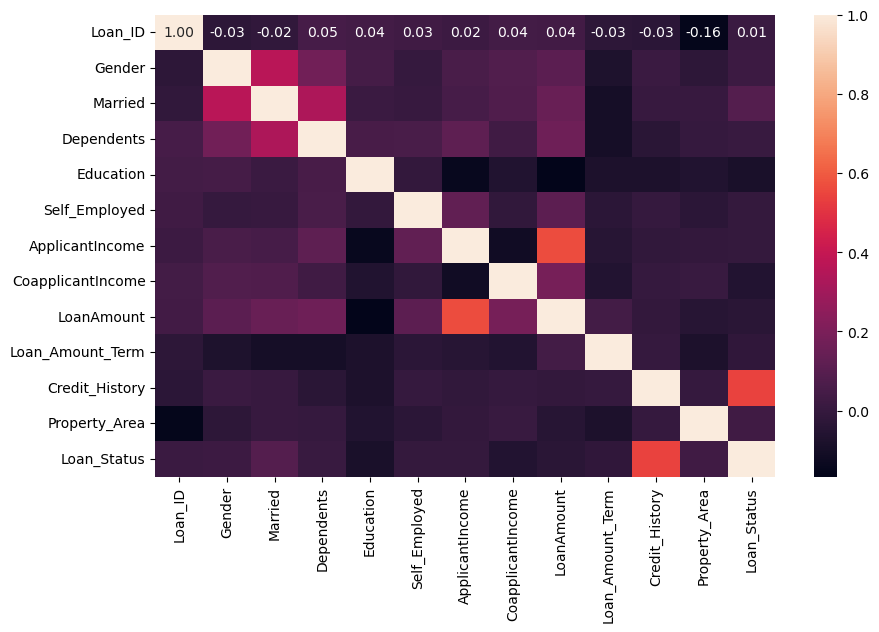

In [22]:
# Showing the correlation among different variables visually using the heatmap.
plt.figure(figsize=(10,6))
sns.heatmap(train_data.corr(),annot=True,fmt='.2f')

# Step 7: Data Separation.

In [23]:
# Feature Selection.
# Selecting independent variables (ApplicantIncome and LoanAmount), and dependent variable (Loan_Status).
X = train_data[['ApplicantIncome', 'LoanAmount']]
y = train_data['Loan_Status']

# Splitting Data into Training, Validation, and Test datasets.
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val , test_size=0.25 , random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Step 8: Training model.

# model 1 (Logistic Regression).

Training Score: 0.7038043478260869


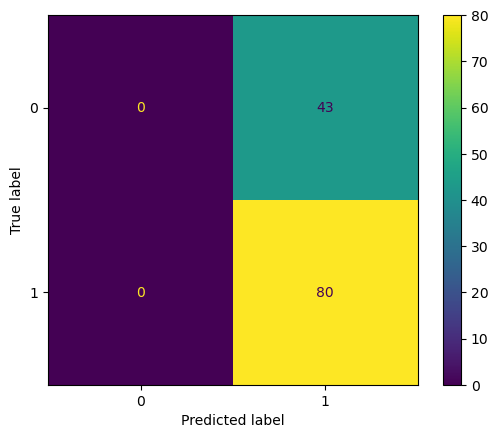

In [33]:
# model 1 (Logistic Regression).

# Importing necessary libraries.
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Scaling features.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initializing and fitting Logistic Regression.
log_reg = LogisticRegression(random_state=0).fit(X_train_scaled, y_train)
y_train_pred = log_reg.predict(X_train_scaled) # Making predictions.
y_test_pred = log_reg.predict(X_test_scaled)

# Evaluating model performance on the training set.
train_score = log_reg.score(X_train_scaled, y_train)
cm = confusion_matrix(y_test, y_test_pred) # Generating confusion matrix for test set
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot() # Displaying confusion matrix on plot.
print(f"Training Score: {train_score}")

# model 2 (Support Vector Machine model).

In [29]:
# model 2 (Support Vector Machine model).

# Importing necessary libraries
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score

# initializing the SVM classifier.
classifier = svm.SVC(kernel='linear')

# Performing cross-validation with 5 folds.
cv_scores = cross_val_score(classifier, X_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())

# fit the model training dataset.
classifier.fit(X_train, y_train)

# Predicting on the test dataset.
X_test_prediction = classifier.predict(X_test)
X_test_prediction

# Evaluating its accuracy.
test_data_accuracy = accuracy_score(y_test, X_test_prediction)
print("Test Data Accuracy:", test_data_accuracy)

Cross-Validation Scores: [0.7027027  0.7027027  0.7027027  0.69863014 0.71232877]
Mean Cross-Validation Score: 0.7038134024435395
Test Data Accuracy: 0.6504065040650406


# model 3 (Decision Tree Classifier).

In [30]:
# model 3 (Decision Tree Classifier).

# Importing necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

# Making predictions on test data.
predict = dtc.predict(X_test)
predict

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1])

In [30]:
# Calculating accuracy score.
accuracy = accuracy_score(y_test, predict)
print(accuracy)

0.6585365853658537
